In [1]:
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import KMeans
import numpy as np
import time


# AVANT LE 10/11 RAPPORT

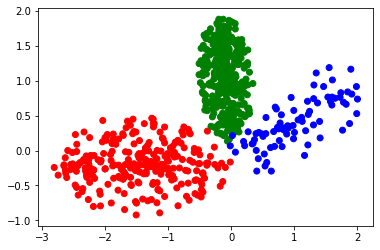

In [2]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

def visualisationSolution(data):
    X, Y, Color = [], [], []

    for point in data[0]:
        #print(point)
        X.append(point[0])
        Y.append(point[1])
        #print(type((str(point[2]))))
        if(str(point[2]) == "b'0'"):
            Color.append("r")
        elif(str(point[2]) == "b'1'"):
            Color.append("g")
        else:
            Color.append("b")

    plt.scatter(X, Y, c=Color)
    plt.show()

def visualisation(data, color):
    X, Y, Color = [], [], []

    for i in range(len(data[0])):
        #print(point)
        X.append(data[0][i][0])
        Y.append(data[0][i][1])
  

    plt.scatter(X, Y, c=color, s=1)
    plt.show()

visualisationSolution(data)

# Debut

In [3]:
def convertirData(data):
    X = []
    for point in data[0]:
        #print(point)
        X.append([point[0],point[1]])
    array = np.array(X)
    return (array)

#convertirData(data)

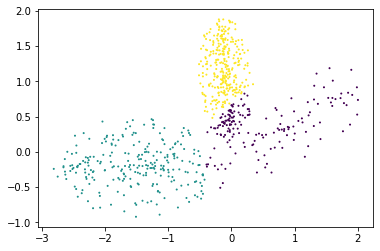

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(convertirData(data))
visualisation(data, kmeans.labels_)

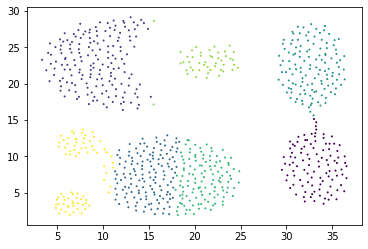

In [5]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/aggregation.arff','r'))
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)

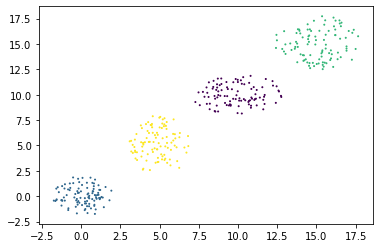

In [6]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/spherical_4_3.arff','r'))
kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


# Score

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [8]:

def trouverKSilhouette(data, r=20):
    print("Début de Silhouette")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = silhouette_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
        
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKDavies(data, r=20):
    print("Début de Davies")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = davies_bouldin_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKCal(data, r=20):
    print("Début de Calinski")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = calinski_harabasz_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverK(data):
    s = trouverKSilhouette(data)
    d = trouverKDavies(data)
    c = trouverKCal(data)
    
    return c
    
    
    
    
    

Début de Silhouette
4 : 0.6897634267742783
--- 0.9582741260528564 seconds ---


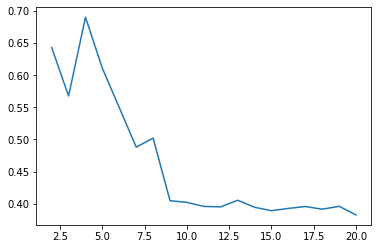

Début de Davies
11 : 0.9246077459663646
--- 0.998136043548584 seconds ---


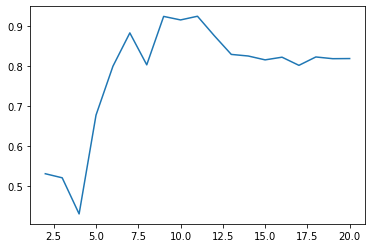

Début de Calinski
4 : 3163.3165487340484
--- 0.9121639728546143 seconds ---


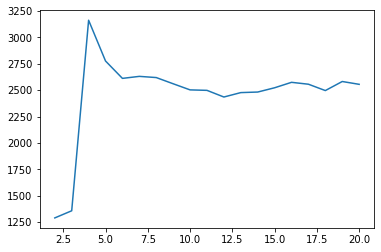

4

In [9]:
trouverK(data)

In [10]:
def tempsSilhouette(data, rmax = 100):
    print("Début de Silhouette en temps")
    
    listeN = []
    listeTemps = []
    
    for r in range(3, rmax):
        start_time = time.time()

        nMeilleur = 0
        scoreMeilleur = 0
        scoreActuel = 0

        for n in range(2, r+1):
            kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
            scoreActuel = silhouette_score(convertirData(data), kmeans.labels_)

            if(scoreActuel > scoreMeilleur):
                scoreMeilleur = scoreActuel
                nMeilleur = n

        listeN.append(r)
        listeTemps.append(time.time() - start_time)

        
    plt.plot(listeN, listeTemps)
    plt.show()

Début de Silhouette en temps


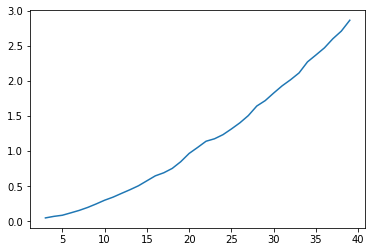

In [11]:
tempsSilhouette(data, 40)

# Limite

Début de Silhouette
20 : 0.39480586365761455
--- 1.109208106994629 seconds ---


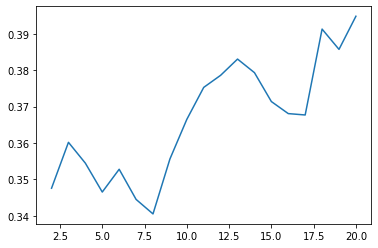

Début de Davies
2 : 1.1684561185868998
--- 1.0571939945220947 seconds ---


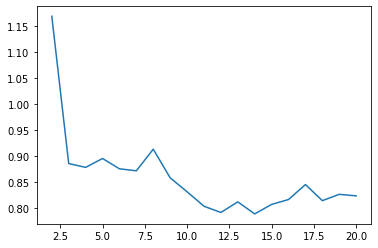

Début de Calinski
19 : 280.1985981427474
--- 0.9686179161071777 seconds ---


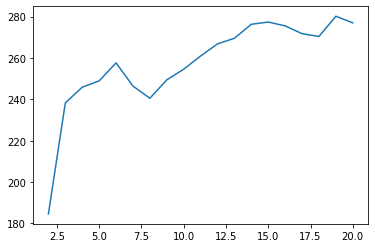

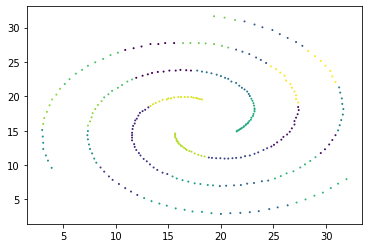

In [12]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/3-spiral.arff','r'))
k = trouverK(data)
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


Début de Silhouette
3 : 0.36865872226237506
--- 9.09927487373352 seconds ---


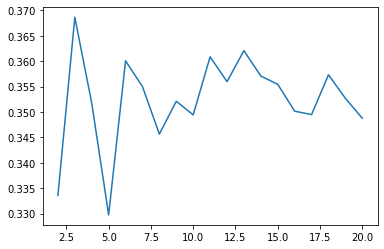

Début de Davies
2 : 1.2285602992930238
--- 3.5721778869628906 seconds ---


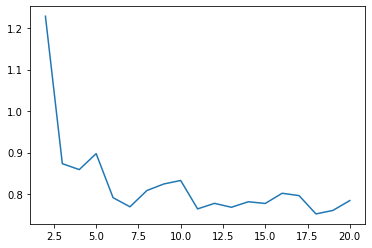

Début de Calinski
20 : 4217.609554429254
--- 3.5997393131256104 seconds ---


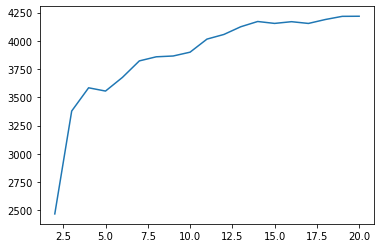

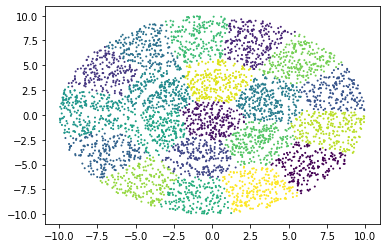

In [13]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/disk-4500n.arff','r'))
k = trouverK(data)
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


#### Une autre métrique aurait aidé à trouver les bons résultats précédement. Mais ici, c'est ma méthode k-means elle même qui pose problème

# Clustering agglomératif

In [14]:
from sklearn.cluster import AgglomerativeClustering

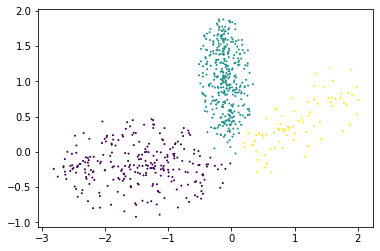

In [15]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

clustering = AgglomerativeClustering(n_clusters=3).fit(convertirData(data))

visualisation(data, clustering.labels_)




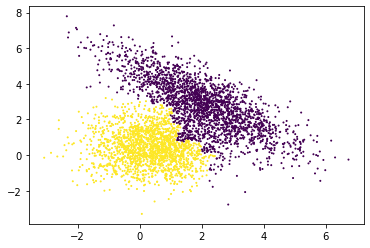

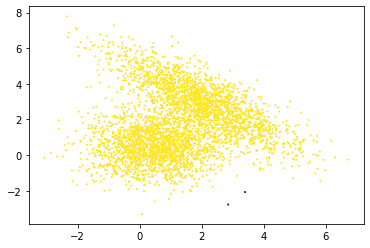

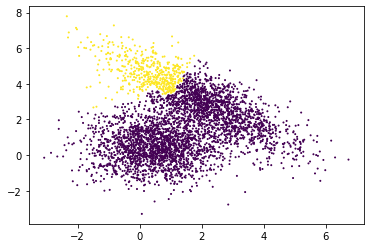

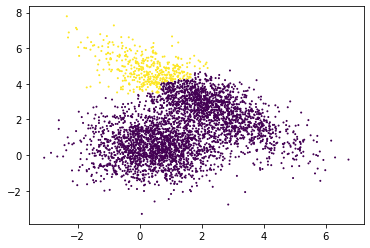

In [16]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/engytime.arff','r'))

clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='single').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='average').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(convertirData(data))
visualisation(data, clustering.labels_)

# Metrique

In [17]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

def trouverKSilhouetteAgglo(data, r=20):
    print("Début de Silhouette")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = silhouette_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
        
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKDaviesAgglo(data, r=20):
    print("Début de Davies")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = davies_bouldin_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKCalAgglo(data, r=20):
    print("Début de Calinski")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = calinski_harabasz_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKAgglo(data):
    s = trouverKSilhouetteAgglo(data)
    d = trouverKDaviesAgglo(data)
    c = trouverKCalAgglo(data)
    
    return d

Début de Silhouette
2 : 0.5728822303437198
--- 0.3278999328613281 seconds ---


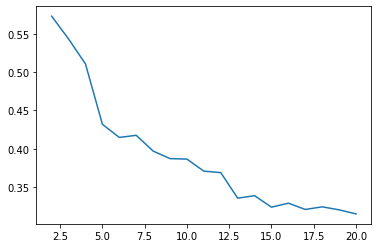

Début de Davies
20 : 0.895761796181975
--- 0.22000694274902344 seconds ---


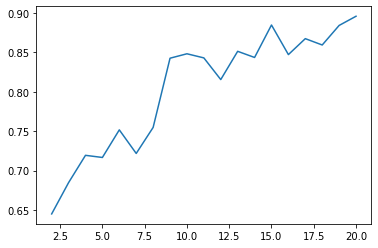

Début de Calinski
9 : 1260.5600958029913
--- 0.18824481964111328 seconds ---


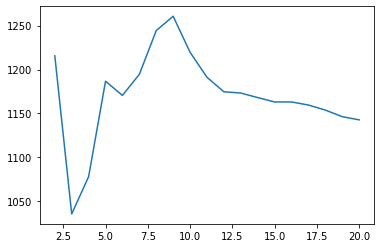

20

In [18]:
trouverKAgglo(data)

Début de Silhouette
20 : 0.36602660907903495
--- 0.10873818397521973 seconds ---


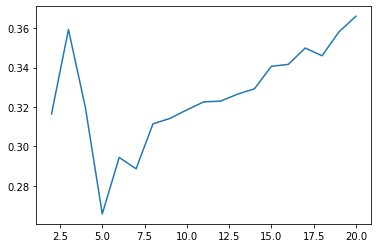

Début de Davies
2 : 1.206715319831201
--- 0.10036110877990723 seconds ---


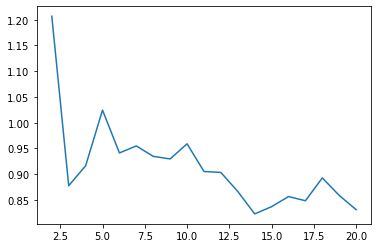

Début de Calinski
19 : 261.0115042460546
--- 0.0647728443145752 seconds ---


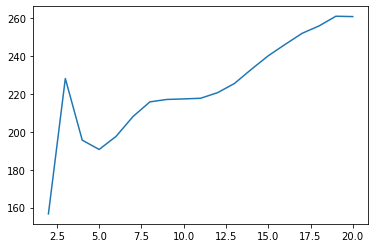

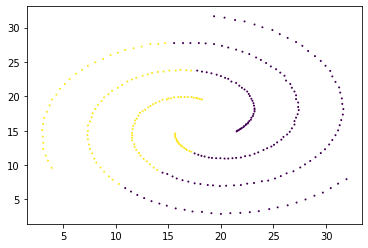

In [19]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/3-spiral.arff','r'))
k = trouverKAgglo(data)
clustering = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(convertirData(data))
visualisation(data, clustering.labels_)


# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

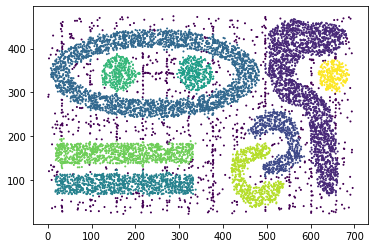

In [21]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/cluto-t7-10k.arff','r'))
clustering = DBSCAN(eps=11, min_samples=20).fit(convertirData(data))
visualisation(data, clustering.labels_)

#plt.title("sbyyyy")
#plt.savefig("sbyyy.jpg".format(fichier))

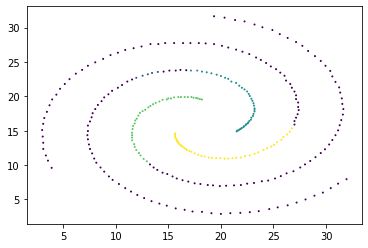

In [22]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/3-spiral.arff','r'))
clustering = DBSCAN(eps=1, min_samples=4).fit(convertirData(data))
visualisation(data, clustering.labels_)



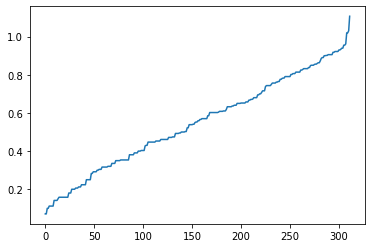

In [23]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import pandas
import numpy as np
#dataset = pandas.read_csv('./dataset/a.data', sep="\t", header=None)
dataset = convertirData(data)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

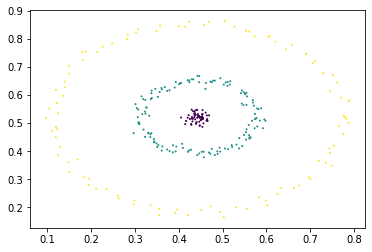

0.15103483200073242


In [24]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/zelnik1.arff','r'))

start_time = time.time()
clustering = DBSCAN(eps=0.06, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)
print(time.time() - start_time)


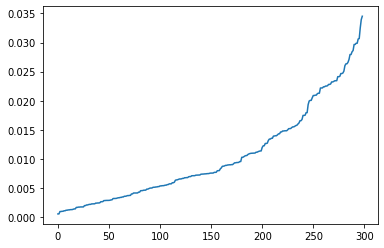

In [25]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import pandas
import numpy as np
#dataset = pandas.read_csv('./dataset/a.data', sep="\t", header=None)
dataset = convertirData(data)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# Limite

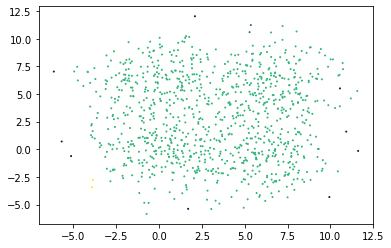

In [26]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/square5.arff','r'))
clustering = DBSCAN(eps=1, min_samples=2).fit(convertirData(data))
visualisation(data, clustering.labels_)


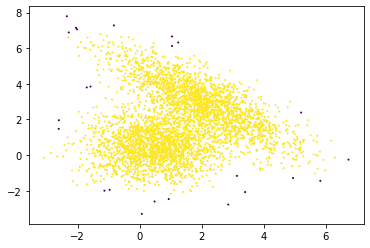

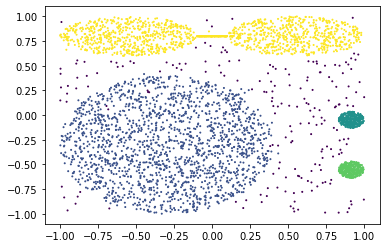

In [27]:
data = arff.loadarff(open('./src/main/resources/datasets/artificial/engytime.arff','r'))
clustering = DBSCAN(eps=0.5, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)

data = arff.loadarff(open('./src/main/resources/datasets/artificial/cure-t2-4k.arff','r'))
clustering = DBSCAN(eps=0.05, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)


# HDBSCAN

In [28]:
!pip install hdbscan

In [29]:
import hdbscan
from sklearn.datasets import make_blobs

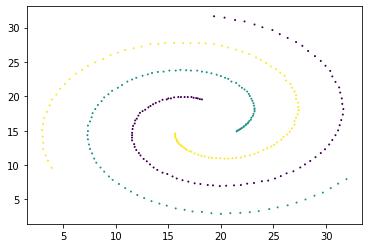

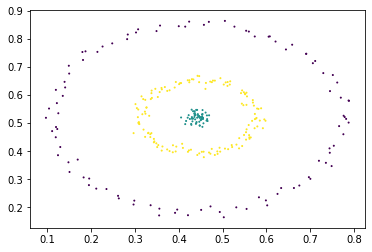

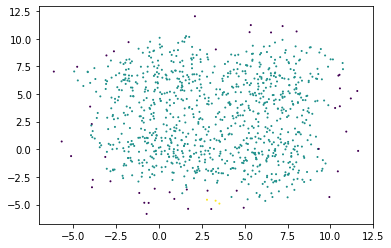

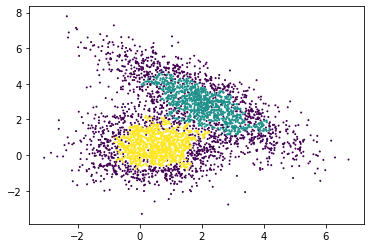

In [30]:
dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/3-spiral.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()

dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/zelnik1.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=4)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()



dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/square5.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=4)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()


dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/engytime.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=5)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()

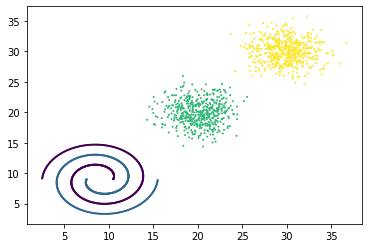

29


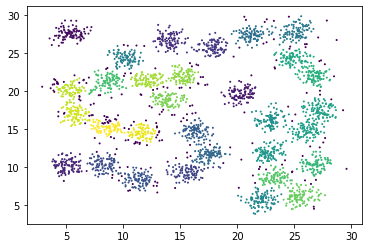

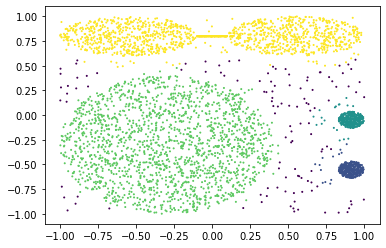

3


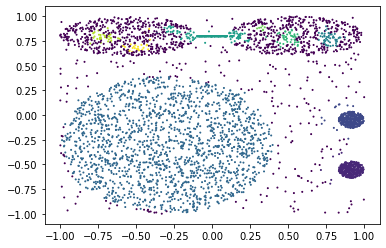

8


In [31]:
dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/2sp2glob.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, min_samples=2)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()


dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/D31.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=1)
label = clusterer.fit_predict(data)
print(max(label))
visualisation(dataOriginale, label)
plt.show()


dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/cure-t2-4k.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN( min_samples=53)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()
print(max(label))

dataOriginale = arff.loadarff(open('./src/main/resources/datasets/artificial/cure-t2-4k.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN( min_samples=52)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()
print(max(label))


# Synthèse

IRIS


In [32]:
def points(data, labels):
    a = davies_bouldin_score(convertirData4D(data), labels)
    b = silhouette_score(convertirData4D(data), labels)
    c = calinski_harabasz_score(convertirData4D(data), labels)
    
    return a,b,c

In [33]:
def pointsPrint(data,labels):
    print("davies : "  + str(davies_bouldin_score(convertirData(data),labels)))
    print("silhouettte : " + str(silhouette_score(convertirData(data), labels)))
    print("Calinski : " + str( calinski_harabasz_score(convertirData(data), labels)))

In [34]:
def visualisation_biggerPoints(data, color):
    X, Y, Color = [], [], []

    for i in range(len(data[0])):
        #print(point)
        X.append(data[0][i][0])
        Y.append(data[0][i][1])
  

    plt.scatter(X, Y, c=color)
    plt.show()

In [35]:
def convertirData4D(data):
    X = []
    for point in data[0]:
        #print(point)
        #print(len(data[0]))
        #print(data[0][len(data[0])-1])
        X.append([point[0],point[1], point[2], point[3]])
    array = np.array(X)
    
    return (array)

In [36]:
import numpy as np

In [37]:
data = arff.loadarff(open('./src/main/resources/datasets/real-world/iris.arff','r'))

#Kmeans
start_time = time.time()
clustering = KMeans(n_clusters=3).fit(convertirData4D(data))
print("time consumed KMEANS: " + str(-start_time + time.time()))
#visualisation_biggerPoints(data, clustering.labels_)
a = points(data,clustering.labels_)

#AGGLO
start_time = time.time()
clustering = AgglomerativeClustering(n_clusters=3).fit(convertirData4D(data))
print("time consumed AGGLO : " + str(-start_time + time.time()))
#visualisation_biggerPoints(data, clustering.labels_)
b = points(data,clustering.labels_)

#DBSCAN
start_time = time.time()
clustering = DBSCAN(eps=0.4, min_samples=3).fit(convertirData4D(data))
print("time consumed DBSCAN : " + str(-start_time + time.time()))
#visualisation_biggerPoints(data, clustering.labels_)
#max(clustering.labels_)
c = points(data,clustering.labels_)




#HDBSCAN
dataOriginale = arff.loadarff(open('./src/main/resources/datasets/real-world/iris.arff','r'))
data = convertirData4D(dataOriginale)
clusterer = hdbscan.HDBSCAN( min_samples=3)
start_time = time.time()
label = clusterer.fit_predict(data)
print("time consumed HDBSCAN : " + str(-start_time + time.time()))
#visualisation_biggerPoints(dataOriginale, label)
#plt.show()
d = points(dataOriginale, label)







time consumed KMEANS: 0.022778034210205078
time consumed AGGLO : 0.0013210773468017578
time consumed DBSCAN : 0.0015549659729003906
time consumed HDBSCAN : 0.0027010440826416016


In [38]:
data = arff.loadarff(open('./src/main/resources/datasets/real-world/iris.arff','r'))

#DBSCANBis - meilleur silhouette
scoreMax = 0
epsMax = 0
sampleMax = 0


for e in np.linspace(0.01, 1, 100):
    for s in range(1, 100):
        try:
            clustering = DBSCAN(eps=abs(e), min_samples=s).fit(convertirData4D(data))
            score = points(data, clustering.labels_)[1]
            if(score > scoreMax):
                scoreMax = score
                epsMax = e
                sampleMax = s
        except ValueError:
            z = 1
print(sampleMax)
print(scoreMax)
        

clustering = DBSCAN(eps=epsMax, min_samples=sampleMax).fit(convertirData4D(data)) 
e = points(data,clustering.labels_)

1
0.686393054320485


In [39]:
#HBSCANBis - meilleur silhouette

dataOriginale = arff.loadarff(open('./src/main/resources/datasets/real-world/iris.arff','r'))
data = convertirData4D(dataOriginale)


scoreMax = 0
sampleMax = 0


for s in range(1, 100):
    try:
        clusterer = hdbscan.HDBSCAN( min_samples=s)
        label = clusterer.fit_predict(data)
        score = points(dataOriginale, label)[1]
        if(score > scoreMax):
            scoreMax = score
            sampleMax = s
    except ValueError:
        z = 1

        
print(sampleMax)
clusterer = hdbscan.HDBSCAN( min_samples=sampleMax)
label = clusterer.fit_predict(data)
f = points(dataOriginale,label)

1


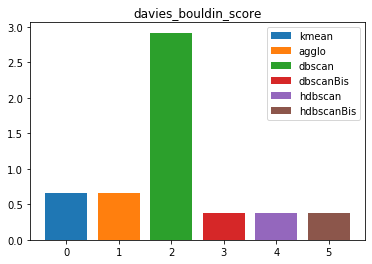

0.6623228649898628
0.6566044124178436
2.915626079355614
0.38359520944914266
0.38359520944914266
0.38359520944914266


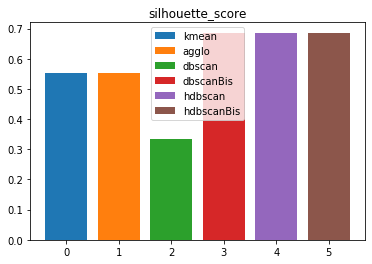

0.552591944521368
0.5540972907866918
0.334621522342743
0.686393054320485
0.686393054320485
0.686393054320485


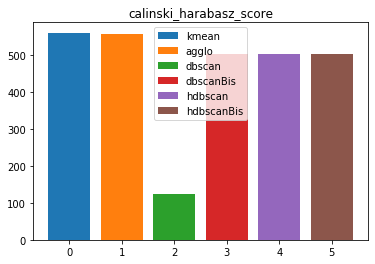

560.3999242466399
556.8411216363928
122.96453164696413
501.9248640964319
501.9248640964319
501.9248640964319


In [40]:
title = ["davies_bouldin_score", "silhouette_score", "calinski_harabasz_score"]
    
for i in range(3):
    plt.bar(0, a[i])
    plt.bar(1, b[i])
    plt.bar(2, c[i])
    plt.bar(3, e[i])
    plt.bar(4, d[i])
    plt.bar(5, f[i])
    plt.legend(["kmean", "agglo", "dbscan", "dbscanBis", "hdbscan", "hdbscanBis"])
    plt.title(title[i])
    plt.show()
    
    print(a[i])
    print(b[i])
    print(c[i])
    print(e[i])
    print(d[i])
    print(f[i])

# Mystère

In [41]:
import pandas

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 


In [43]:
def find_eps_samples_silhouette(data):#higher the better
    scoreMax = 0
    epsMax = 0
    sampleMax = 0
    for e in np.linspace(0.1, 10, 100):
        for s in range(1, 100):
            try:
                clustering = DBSCAN(eps=e, min_samples=s).fit(data)
                score = silhouette_score(data, clustering.labels_)
                if(score > scoreMax):
                    scoreMax = score
                    epsMax = e
                    sampleMax = s
            except ValueError:
                z = 1
    print(scoreMax)
    print(sampleMax)
    print(epsMax)
    return (epsMax, sampleMax)

def find_eps_samples_davies(data):#lower the better
    scoreMin = 100
    epsMax = 0
    sampleMax = 0
    for e in np.linspace(0.1, 10, 100):
        for s in range(1, 100):
            try:
                clustering = DBSCAN(eps=e, min_samples=s).fit(data)
                
                score = davies_bouldin_score(data, clustering.labels_)
                #print(str(e) + " "+ str(s) +"  "+ str(score))
                if(score < scoreMin):
                    scoreMin = score
                    epsMax = e
                    sampleMax = s
            except ValueError:
                z = 1
    print(scoreMin)
    print(sampleMax)
    print(epsMax)
    return (epsMax, sampleMax)

def find_eps_samples_calinski(data):#higher the better
    scoreMax = 0
    epsMax = 0
    sampleMax = 0
    for e in np.linspace(0.1, 10, 100):
        for s in range(1, 100):
            try:
                clustering = DBSCAN(eps=e, min_samples=s).fit(data)
                score = calinski_harabasz_score(data, clustering.labels_)
                if(score > scoreMax):
                    scoreMax = score
                    epsMax = e
                    sampleMax = s
            except ValueError:
                z = 1
    print(scoreMax)
    print(sampleMax)
    print(epsMax)
    return (epsMax, sampleMax)
        
def pointsPrint_synthese(data,labels):
    print("davies : "  + str(davies_bouldin_score(data,labels)))
    print("silhouettte : " + str(silhouette_score(data, labels)))
    print("Calinski : " + str( calinski_harabasz_score(data, labels)))


In [44]:
data = pandas.read_csv('./dataset/a.data', sep="\t", header=None)
find_eps_samples_silhouette(data)

0.5457359533548343
1
5.6


(5.6, 1)

In [45]:
data = pandas.read_csv('./dataset/a.data', sep="\t", header=None)
find_eps_samples_davies(data)

0.004354881381983
1
0.1


(0.1, 1)

In [46]:
data = pandas.read_csv('./dataset/a.data', sep="\t", header=None)
find_eps_samples_calinski(data)

378863.45488302974
1
0.1


(0.1, 1)

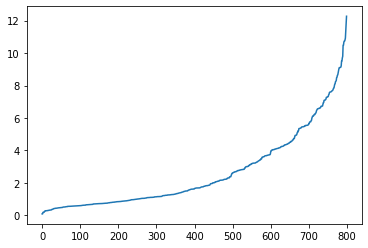

In [47]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import pandas
import numpy as np
dataset = pandas.read_csv('./dataset/a.data', sep="\t", header=None)

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [48]:
def find_min_sample_hdbscan(data):
    sample_best = 0
    silhouette_best = 0
    davies_best = 0
    calinski_best = 0
    silhouette_score_best = 0
    davies_score_best = 1000
    calinski_score_best = 0
    for i in range(1,100):
        clusterer = hdbscan.HDBSCAN(min_samples=i)
        label = clusterer.fit_predict(data)
        try:
            if(davies_bouldin_score(data,label)< davies_score_best):
                davies_best = i
                davies_score_best = davies_bouldin_score(data,label)
            if(silhouette_score(data,label)> silhouette_score_best):
                silhouette_best = i
                silhouette_score_best = silhouette_score(data,label)
            if(calinski_harabasz_score(data, label)> calinski_score_best):
                calinski_best = i
                calinski_score_best = calinski_harabasz_score(data, label)
        except ValueError:
            a = 1 
    print("best davies: " + str(davies_best))
    print("best silhouette: " + str(silhouette_best))
    print("best calinski: " + str(calinski_best))

# DATA-SET A


In [49]:
data = pandas.read_csv('./dataset/a.data', sep="\t", header=None)
find_min_sample_hdbscan(data)

best davies: 33
best silhouette: 33
best calinski: 33


brute


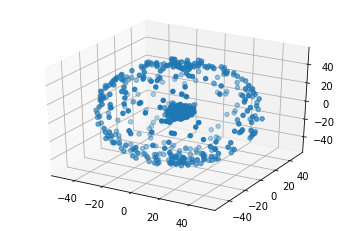

DBSCAN meilleure silhouette


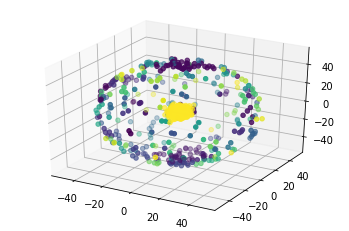

178
davies : 0.35435259391872337
silhouettte : 0.5457359533548343
Calinski : 155.10768707364866
DBSCAN meilleure davies


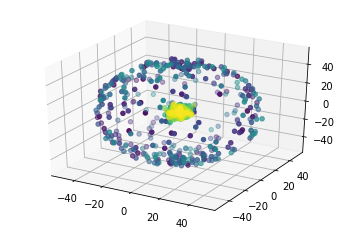

798
davies : 0.004354881381983
silhouettte : 0.0021704011799095458
Calinski : 378863.45488302974
DBSCAN meilleure calinski


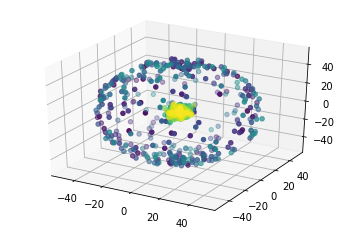

798
davies : 0.004354881381983
silhouettte : 0.0021704011799095458
Calinski : 378863.45488302974
KMeans


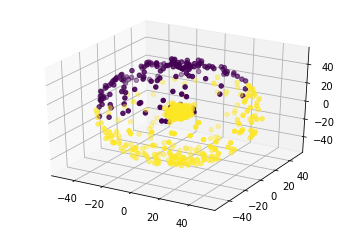

davies : 1.2899774172084404
silhouettte : 0.41762078590995527
Calinski : 273.0808693739888
OPTICS
1


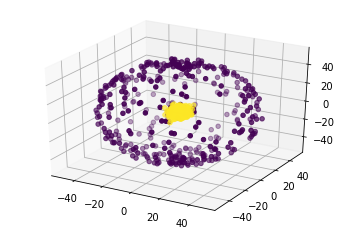

davies : 20.197976342030067
silhouettte : 0.31149297508558416
Calinski : 1.1598306291636347
Aglomératif


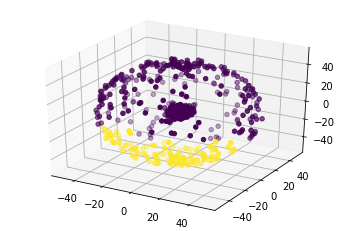

davies : 1.1437576011891268
silhouettte : 0.41073709133177916
Calinski : 242.8580529068915
HDBSCAN
2


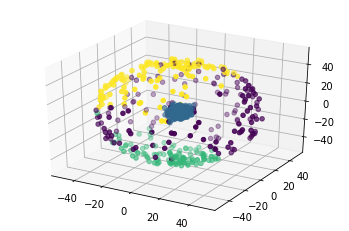

davies : 3.866335108615599
silhouettte : 0.46116867414430485
Calinski : 176.04447895236103


In [50]:
# data1
data = pandas.read_csv('./dataset/a.data', sep="\t", header=None)



print("brute")
ax = plt.axes(projection='3d')
ax.scatter3D(data[0], data[1], data[2])
plt.show()

#traitée
print("DBSCAN meilleure silhouette")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=5.6, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure davies")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=0.1, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure calinski")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=0.1, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)




#traitée
print("KMeans")
ax = plt.axes(projection='3d')
clustering = KMeans(n_clusters=2).fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
from sklearn.cluster import OPTICS
print("OPTICS")
ax = plt.axes(projection='3d')
clustering = OPTICS(min_samples = 45).fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
print(max(clustering.labels_))
#print(clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)

#The most notable is OPTICS, a DBSCAN variation that does away with the epsilon parameter; it produces a hierarchical result that can roughly be seen as "running DBSCAN with every possible epsilon".

#For minPts, I do suggest to not rely on an automatic method, but on your domain knowledge.


#traitée
print("Aglomératif")
ax = plt.axes(projection='3d')
clustering = AgglomerativeClustering(n_clusters=2).fit(data)
ax.scatter(data[0], data[1],data[2], c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
print("HDBSCAN")

clusterer = hdbscan.HDBSCAN(min_samples=33)
label = clusterer.fit_predict(data)
ax = plt.axes(projection='3d')
ax.scatter(data[0], data[1],data[2], c=label)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)



DBSCAN meilleure calinski


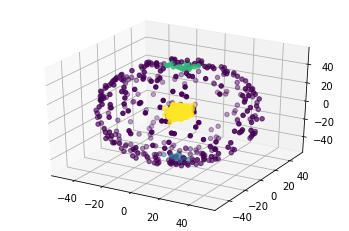

2
davies : 10.231235688817236
silhouettte : 0.3003945054385985
Calinski : 33.95731055671021


In [51]:
print("DBSCAN meilleure calinski")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=5, min_samples=7).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)




# DATA-SET H


In [52]:
data = pandas.read_csv('./dataset/h.data', sep="\t", header=None)
print('silhouette')
find_eps_samples_silhouette(data)
print("")
print("calinski")
find_eps_samples_calinski(data)
print("")
print("davies")
find_eps_samples_davies(data)

silhouette
0.7019231989948803
1
0.8

calinski
1753.6488460423898
1
0.1

davies
0.0428948556304729
1
0.1


(0.1, 1)

In [53]:
data = pandas.read_csv('./dataset/h.data', sep="\t", header=None)
find_min_sample_hdbscan(data)

best davies: 1
best silhouette: 1
best calinski: 1


brute


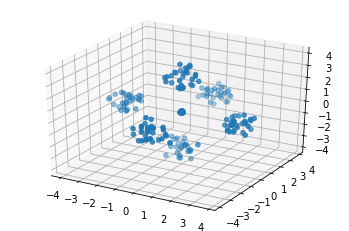

DBSCAN meilleure silhouette


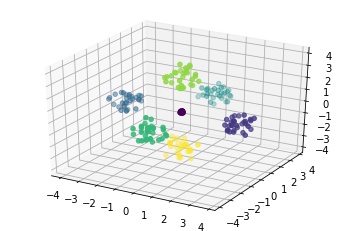

6
davies : 0.3550385854651829
silhouettte : 0.7019231989948803
Calinski : 519.937197216115
DBSCAN meilleure davies


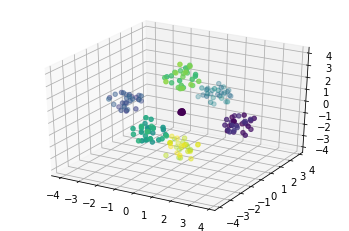

175
davies : 0.0428948556304729
silhouettte : 0.18039269129986962
Calinski : 1753.6488460423898
DBSCAN meilleure calinski


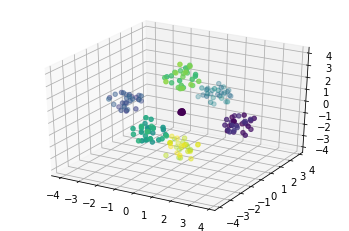

175
davies : 0.0428948556304729
silhouettte : 0.18039269129986962
Calinski : 1753.6488460423898
KMeans


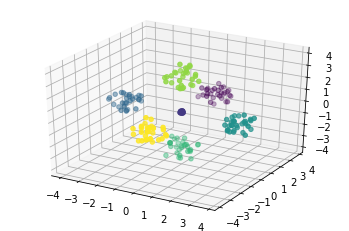

davies : 0.3550385854651829
silhouettte : 0.7019231989948803
Calinski : 519.9371972161151
OPTICS
9


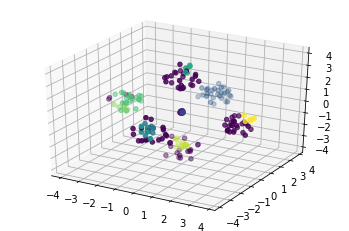

davies : 1.6431765732364203
silhouettte : -0.02140432007410738
Calinski : 22.685345951486834
Aglomératif


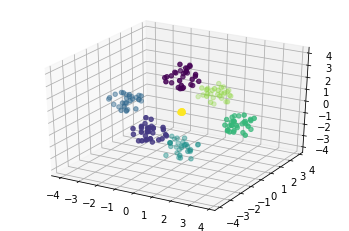

davies : 0.35503858546518297
silhouettte : 0.7019231989948803
Calinski : 519.9371972161148
HDBSCAN
6


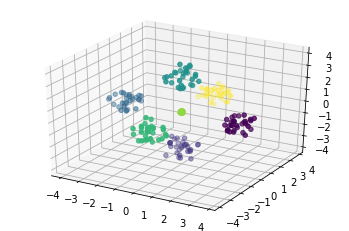

davies : 0.35503858546518297
silhouettte : 0.7019231989948803
Calinski : 519.937197216115


In [54]:
# data2
data = pandas.read_csv('./dataset/h.data', sep="\t", header=None)

# brute
print("brute")
ax = plt.axes(projection='3d')
ax.scatter3D(data[0], data[1], data[2])
plt.show()

#traitée
print("DBSCAN meilleure silhouette")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=0.8, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure davies")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=0.1, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure calinski")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=0.1, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)




#traitée
print("KMeans")
ax = plt.axes(projection='3d')
clustering = KMeans(n_clusters=7).fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
from sklearn.cluster import OPTICS
print("OPTICS")
ax = plt.axes(projection='3d')
clustering = OPTICS().fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
print(max(clustering.labels_))
#print(clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)

#The most notable is OPTICS, a DBSCAN variation that does away with the epsilon parameter; it produces a hierarchical result that can roughly be seen as "running DBSCAN with every possible epsilon".

#For minPts, I do suggest to not rely on an automatic method, but on your domain knowledge.


#traitée
print("Aglomératif")
ax = plt.axes(projection='3d')
clustering = AgglomerativeClustering(n_clusters=7).fit(data)
ax.scatter(data[0], data[1],data[2], c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
print("HDBSCAN")

clusterer = hdbscan.HDBSCAN(min_samples=1)
label = clusterer.fit_predict(data)
ax = plt.axes(projection='3d')
ax.scatter(data[0], data[1],data[2], c=label)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)





In [55]:
data = pandas.read_csv('./dataset/t.data', sep="\t", header=None)
print('silhouette')
find_eps_samples_silhouette(data)
print("")
print("calinski")
find_eps_samples_calinski(data)
print("")
print("davies")
find_eps_samples_davies(data)

silhouette
0.5057889289788572
93
1.1

calinski
775.3077538506845
1
0.1

davies
0.07728266145337416
1
0.1


(0.1, 1)

# DATA-SET T


In [56]:
data = pandas.read_csv('./dataset/t.data', sep="\t", header=None)
find_min_sample_hdbscan(data)

best davies: 71
best silhouette: 2
best calinski: 2


brute


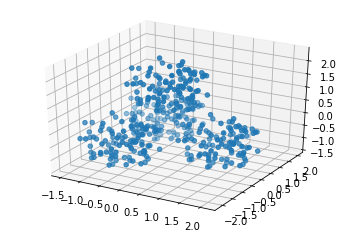

DBSCAN meilleure silhouette


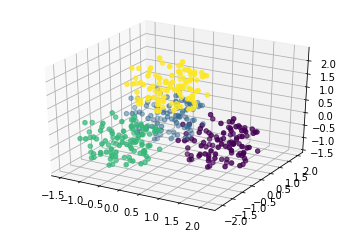

3
davies : 0.662644567562499
silhouettte : 0.5057889289788572
Calinski : 418.39120908961354
DBSCAN meilleure davies


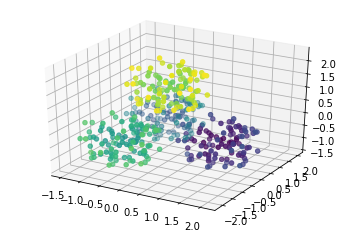

395
davies : 0.048334561500677733
silhouettte : 0.014186898737405815
Calinski : 1058.5956505332792
DBSCAN meilleure calinski


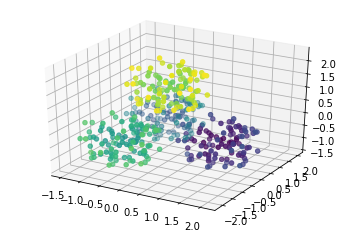

395
davies : 0.048334561500677733
silhouettte : 0.014186898737405815
Calinski : 1058.5956505332792
KMeans


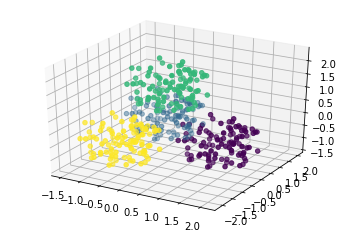

davies : 0.662644567562499
silhouettte : 0.5057889289788572
Calinski : 418.3912090896135
OPTICS
28


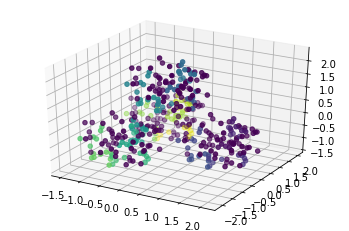

davies : 1.317389483521549
silhouettte : -0.19104153984107397
Calinski : 9.388279074996543
Aglomératif


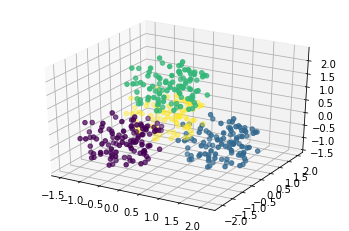

davies : 0.6875570782098607
silhouettte : 0.4952113887827159
Calinski : 402.5688669125227
HDBSCAN best silhouette/calinski
3


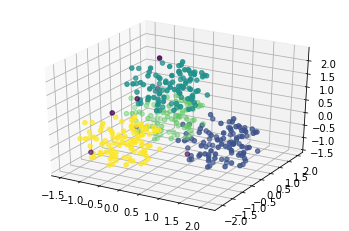

davies : 1.594220843223276
silhouettte : 0.46931762879594685
Calinski : 296.6766291171287
HDBSCAN best davies
3


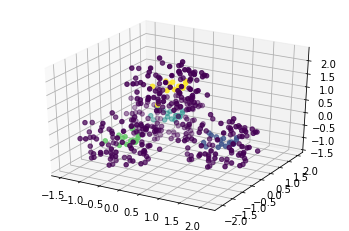

davies : 1.442726458578028
silhouettte : -0.39265654544443107
Calinski : 11.31161677270984


In [57]:
# data3
data = pandas.read_csv('./dataset/t.data', sep="\t", header=None)

# brute
print("brute")
ax = plt.axes(projection='3d')
ax.scatter3D(data[0], data[1], data[2])
plt.show()

#traitée
print("DBSCAN meilleure silhouette")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=1.1, min_samples=93).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure davies")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=0.07, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure calinski")
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=0.07, min_samples=1).fit(data)
ax.scatter3D(data[0], data[1], data[2], c = clustering.labels_)
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)




#traitée
print("KMeans")
ax = plt.axes(projection='3d')
clustering = KMeans(n_clusters=4).fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
from sklearn.cluster import OPTICS
print("OPTICS")
ax = plt.axes(projection='3d')
clustering = OPTICS(min_samples = 4).fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
print(max(clustering.labels_))
#print(clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)

#The most notable is OPTICS, a DBSCAN variation that does away with the epsilon parameter; it produces a hierarchical result that can roughly be seen as "running DBSCAN with every possible epsilon".

#For minPts, I do suggest to not rely on an automatic method, but on your domain knowledge.


#traitée
print("Aglomératif")
ax = plt.axes(projection='3d')
clustering = AgglomerativeClustering(n_clusters=4).fit(data)
ax.scatter(data[0], data[1],data[2], c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
print("HDBSCAN best silhouette/calinski")

clusterer = hdbscan.HDBSCAN(min_samples=2)
label = clusterer.fit_predict(data)
ax = plt.axes(projection='3d')
ax.scatter(data[0], data[1],data[2], c=label)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)

print("HDBSCAN best davies")

clusterer = hdbscan.HDBSCAN(min_samples=71)
label = clusterer.fit_predict(data)
ax = plt.axes(projection='3d')
ax.scatter(data[0], data[1],data[2], c=label)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)






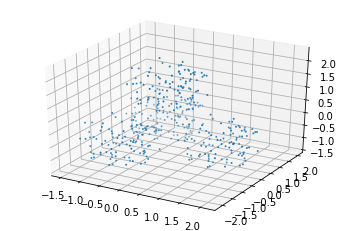

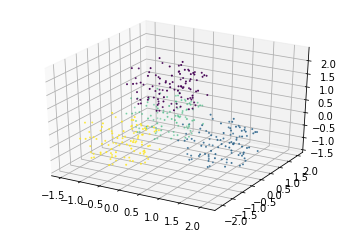

In [58]:
# data2
data = pandas.read_csv('./dataset/t.data', sep="\t", header=None)

# brute
ax = plt.axes(projection='3d')
ax.scatter3D(data[0], data[1], data[2], s = 1)
plt.show()

#traitée
ax = plt.axes(projection='3d')
clustering = KMeans(n_clusters=4).fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_, s = 1)
plt.show()


# DATA-SET TR


In [59]:
data = pandas.read_csv('./dataset/tr.data', sep=" ", header=None)
print('silhouette')
#find_eps_samples_silhouette(data)
print("")
print("calinski")
#find_eps_samples_calinski(data)
print("")
print("davies")
#find_eps_samples_davies(data)

silhouette

calinski

davies


In [60]:
find_min_sample_hdbscan(data)

best davies: 13
best silhouette: 13
best calinski: 13


brute


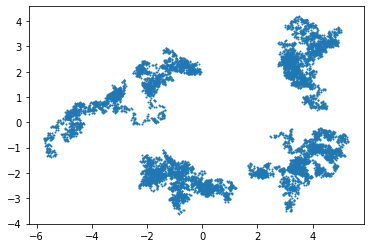

DBSCAN meilleure silhouette


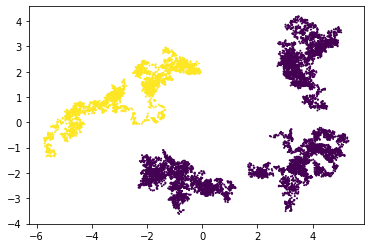

1
davies : 0.8949823394292955
silhouettte : 0.3974669305652979
Calinski : 5980.293861232286
DBSCAN meilleure davies


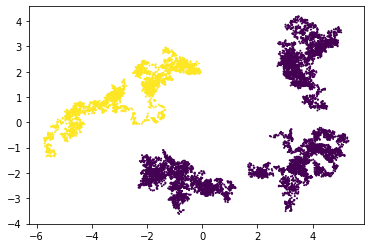

1
davies : 0.8949823394292955
silhouettte : 0.3974669305652979
Calinski : 5980.293861232286
DBSCAN meilleure calinski


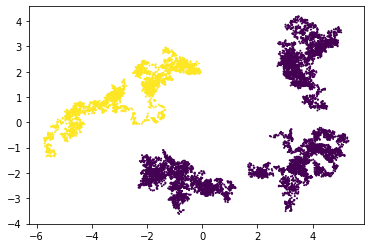

1
davies : 0.8949823394292955
silhouettte : 0.3974669305652979
Calinski : 5980.293861232286
KMeans


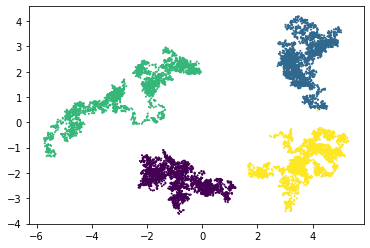

davies : 0.5354753851728694
silhouettte : 0.6349989652445125
Calinski : 25452.26156047767
OPTICS
876


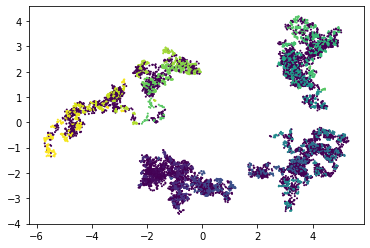

davies : 1.0789086698054484
silhouettte : -0.1306949920698479
Calinski : 13.16454851391004
Aglomératif


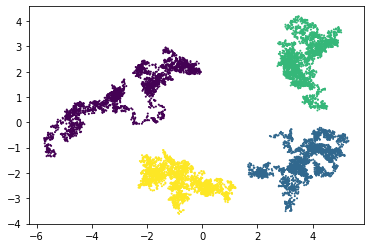

davies : 0.5354813068484842
silhouettte : 0.6350054855081031
Calinski : 25452.089382728933
HDBSCAN best silhouette/calinski
317


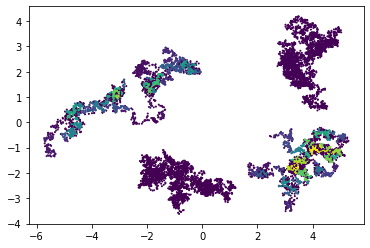

davies : 1.1221477814137197
silhouettte : 0.27832218905101375
Calinski : 151.57120442900708
HDBSCAN best davies
3


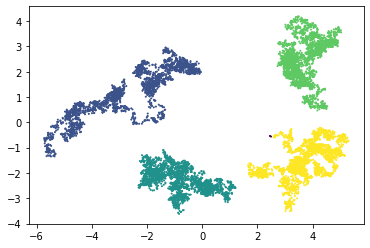

davies : 0.5797343535943693
silhouettte : 0.510828230590948
Calinski : 19094.14710186756


In [61]:

# brute
print("brute")
plt.scatter(data[0], data[1],s = 1)
plt.show()

#traitée
print("DBSCAN meilleure silhouette")
clustering = DBSCAN(eps=0.79, min_samples=41).fit(data)
plt.scatter(data[0], data[1],s = 1, c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure davies")
clustering = DBSCAN(eps=0.79, min_samples=41).fit(data)
plt.scatter(data[0], data[1],s = 1, c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure calinski")
clustering = DBSCAN(eps=0.79, min_samples=41).fit(data)
plt.scatter(data[0], data[1],s = 1, c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)




#traitée
print("KMeans")
clustering = KMeans(n_clusters=4).fit(data)
plt.scatter(data[0], data[1],  c=clustering.labels_ , s =1)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
from sklearn.cluster import OPTICS
print("OPTICS")
clustering = OPTICS(min_samples = 4).fit(data)
plt.scatter(data[0], data[1],  c=clustering.labels_ , s= 1)
print(max(clustering.labels_))
#print(clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)

#The most notable is OPTICS, a DBSCAN variation that does away with the epsilon parameter; it produces a hierarchical result that can roughly be seen as "running DBSCAN with every possible epsilon".

#For minPts, I do suggest to not rely on an automatic method, but on your domain knowledge.


#traitée
print("Aglomératif")
clustering = AgglomerativeClustering(n_clusters=4).fit(data)
plt.scatter(data[0], data[1],c=clustering.labels_, s = 1)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
print("HDBSCAN best silhouette/calinski")

clusterer = hdbscan.HDBSCAN(min_samples=2)
label = clusterer.fit_predict(data)

plt.scatter(data[0], data[1], c=label , s = 1)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)

print("HDBSCAN best davies")

clusterer = hdbscan.HDBSCAN(min_samples=71)
label = clusterer.fit_predict(data)
plt.scatter(data[0], data[1], c=label, s = 1)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)







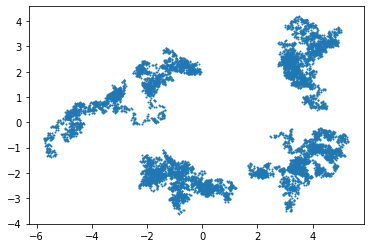

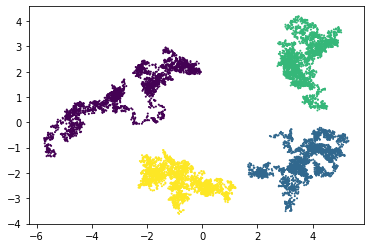

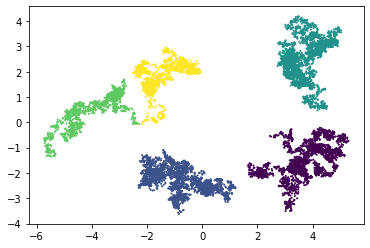

In [62]:
# data2
data = pandas.read_csv('./dataset/tr.data', sep=" ", header=None)

# brute
plt.scatter(data[0], data[1],s = 1)
plt.show()

#traitée
clustering = AgglomerativeClustering(n_clusters=4).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_, s =1)
plt.show()


#traitée
clustering = AgglomerativeClustering(n_clusters=5).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_, s = 1)
plt.show()

# DATA-SET ZGN

In [63]:
data = pandas.read_csv('./dataset/zgn.data', sep=" ", header=None)
print('silhouette')
find_eps_samples_silhouette(data)
print("")
print("calinski")
find_eps_samples_calinski(data)
print("")
print("davies")
find_eps_samples_davies(data)


silhouette
0.5147702224347162
24
0.6

calinski
687.6943924055684
1
0.1

davies
0.36087971309309524
1
0.1


(0.1, 1)

In [64]:
find_min_sample_hdbscan(data)

best davies: 26
best silhouette: 17
best calinski: 8


brute


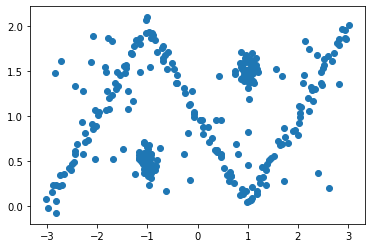

DBSCAN meilleure silhouette


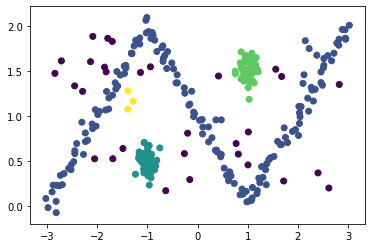

3
davies : 3.7239602666005447
silhouettte : -0.033043647074931785
Calinski : 15.81486189027324
DBSCAN meilleure davies


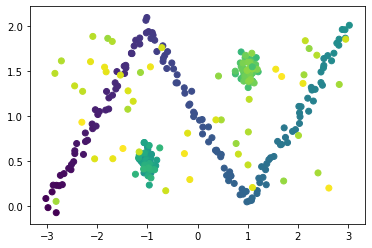

291
davies : 0.023999453984501647
silhouettte : 0.038017858965236816
Calinski : 116305.45115096883
DBSCAN meilleure calinski


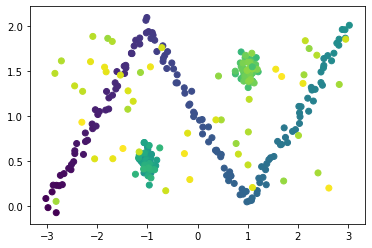

291
davies : 0.023999453984501647
silhouettte : 0.038017858965236816
Calinski : 116305.45115096883
KMeans


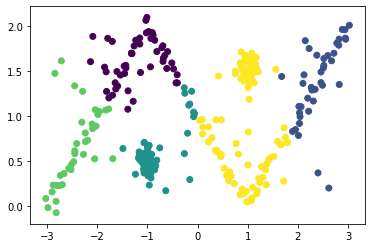

davies : 0.7138635240525627
silhouettte : 0.5006596751188372
Calinski : 546.870175326654
OPTICS
39


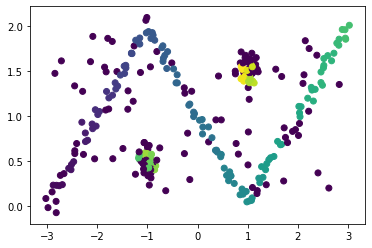

davies : 1.9963842852925662
silhouettte : -0.06335288499777673
Calinski : 8.517095941169524
Aglomératif


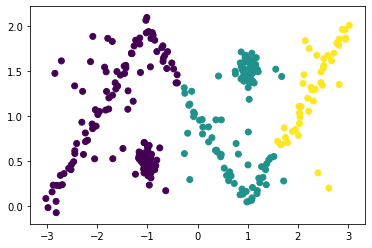

davies : 0.7423102379775762
silhouettte : 0.4863215419743527
Calinski : 492.5371430340124
HDBSCAN best silhouette
4


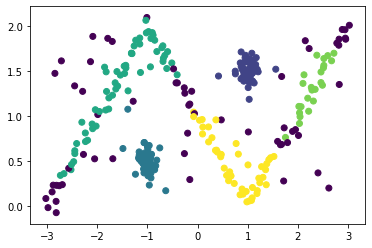

davies : 1.8919012583022023
silhouettte : 0.3438587758627703
Calinski : 75.30070973984778
HDBSCAN best davies
4


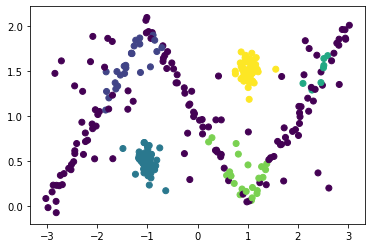

davies : 1.5097939661257367
silhouettte : 0.1223796320354644
Calinski : 28.74102837262377
HDBSCAN best calinski
3


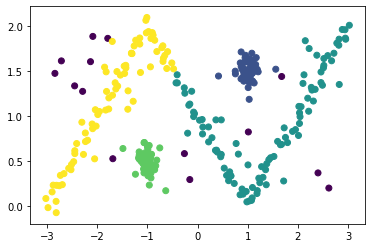

davies : 2.4829247170925273
silhouettte : 0.29348520337142503
Calinski : 158.38885310604854


In [65]:
data = pandas.read_csv('./dataset/zgn.data', sep=" ", header=None)
# brute
print("brute")
plt.scatter(data[0], data[1])
plt.show()

#traitée
print("DBSCAN meilleure silhouette")
clustering = DBSCAN(eps=0.2, min_samples=3).fit(data)
plt.scatter(data[0], data[1], c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure davies")
clustering = DBSCAN(eps=0.01, min_samples=1).fit(data)
plt.scatter(data[0], data[1], c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure calinski")
clustering = DBSCAN(eps=0.01, min_samples=1).fit(data)
plt.scatter(data[0], data[1], c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)




#traitée
print("KMeans")
clustering = KMeans(n_clusters=5).fit(data)
plt.scatter(data[0], data[1],  c=clustering.labels_ )
plt.show()
pointsPrint_synthese(data,clustering.labels_)
from sklearn.cluster import OPTICS
print("OPTICS")
clustering = OPTICS(min_samples = 3).fit(data)
plt.scatter(data[0], data[1],  c=clustering.labels_ )
print(max(clustering.labels_))
#print(clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)

#The most notable is OPTICS, a DBSCAN variation that does away with the epsilon parameter; it produces a hierarchical result that can roughly be seen as "running DBSCAN with every possible epsilon".

#For minPts, I do suggest to not rely on an automatic method, but on your domain knowledge.


#traitée
print("Aglomératif")
clustering = AgglomerativeClustering(n_clusters=3).fit(data)
plt.scatter(data[0], data[1],c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
print("HDBSCAN best silhouette")

clusterer = hdbscan.HDBSCAN(min_samples=17)
label = clusterer.fit_predict(data)

plt.scatter(data[0], data[1], c=label )
print(max(label))
plt.show()
pointsPrint_synthese(data,label)

print("HDBSCAN best davies")

clusterer = hdbscan.HDBSCAN(min_samples=26)
label = clusterer.fit_predict(data)
plt.scatter(data[0], data[1], c=label)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)



print("HDBSCAN best calinski")

clusterer = hdbscan.HDBSCAN(min_samples=8)
label = clusterer.fit_predict(data)

plt.scatter(data[0], data[1], c=label )
print(max(label))
plt.show()
pointsPrint_synthese(data,label)




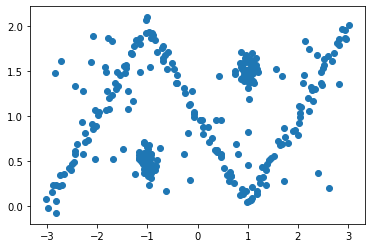

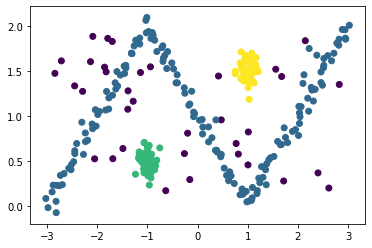

davies : 2.4829247170925273
silhouettte : 0.29348520337142503
Calinski : 158.38885310604854


In [66]:
# data2
data = pandas.read_csv('./dataset/zgn.data', sep=" ", header=None)

# brute
plt.scatter(data[0], data[1])
plt.show()

#traitée
clustering = DBSCAN(eps=0.2, min_samples=4).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,label)

# DATA-SET ZGO

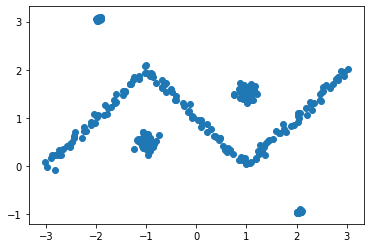

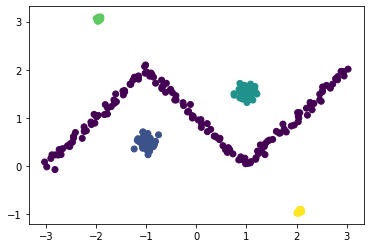

4


In [68]:
# data2
data = pandas.read_csv('./dataset/zgo.data', sep=" ", header=None)

# brute
plt.scatter(data[0], data[1])
plt.show()

#traitée
clustering = DBSCAN(eps=0.2, min_samples=4).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_)
plt.show()
print(max(clustering.labels_))
#pointsPrint_synthese(data,label)

In [ ]:
data = pandas.read_csv('./dataset/zgo.data', sep=" ", header=None)
print('silhouette')
find_eps_samples_silhouette(data)
print("")
print("calinski")
find_eps_samples_calinski(data)
print("")
print("davies")
find_eps_samples_davies(data)



In [ ]:
find_min_sample_hdbscan(data)

In [ ]:

# brute
print("brute")
plt.scatter(data[0], data[1])
plt.show()

#traitée
print("DBSCAN meilleure silhouette")
clustering = DBSCAN(eps=0.2, min_samples=7).fit(data)
plt.scatter(data[0], data[1], c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure davies")
clustering = DBSCAN(eps=0.1, min_samples=1).fit(data)
plt.scatter(data[0], data[1], c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)

print("DBSCAN meilleure calinski")
clustering = DBSCAN(eps=0.1, min_samples=1).fit(data)
plt.scatter(data[0], data[1], c = clustering.labels_ )
plt.show()
print(max(clustering.labels_))
#print(clustering.labels_)
pointsPrint_synthese(data,clustering.labels_)




#traitée
print("KMeans")
clustering = KMeans(n_clusters=5).fit(data)
plt.scatter(data[0], data[1],  c=clustering.labels_ )
plt.show()
pointsPrint_synthese(data,clustering.labels_)
from sklearn.cluster import OPTICS
print("OPTICS")
clustering = OPTICS(min_samples = 3).fit(data)
plt.scatter(data[0], data[1],  c=clustering.labels_ )
print(max(clustering.labels_))
#print(clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)

#The most notable is OPTICS, a DBSCAN variation that does away with the epsilon parameter; it produces a hierarchical result that can roughly be seen as "running DBSCAN with every possible epsilon".

#For minPts, I do suggest to not rely on an automatic method, but on your domain knowledge.


#traitée
print("Aglomératif")
clustering = AgglomerativeClustering(n_clusters=3).fit(data)
plt.scatter(data[0], data[1],c=clustering.labels_)
plt.show()
pointsPrint_synthese(data,clustering.labels_)
print("HDBSCAN best silhouette/calinski")

clusterer = hdbscan.HDBSCAN(min_samples=18)
label = clusterer.fit_predict(data)

plt.scatter(data[0], data[1], c=label )
print(max(label))
plt.show()
pointsPrint_synthese(data,label)

print("HDBSCAN best davies")

clusterer = hdbscan.HDBSCAN(min_samples=1)
label = clusterer.fit_predict(data)
plt.scatter(data[0], data[1], c=label)
print(max(label))
plt.show()
pointsPrint_synthese(data,label)






